In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
params = { 'axes.grid': True
          ,'axes.axisbelow': True
          ,'grid.color': '0.5'
          ,'legend.numpoints': 1
          ,'savefig.bbox': 'tight'
          ,'font.size': 16
          ,'legend.loc': 'best'
          ,'legend.fontsize': 'medium'
          #,'lines.markersize': 6
          ,'xtick.labelsize': 'small'
          ,'ytick.labelsize': 'small'
          #,'xtick.direction': 'out'
          #,'ytick.direction': 'out'
          #,'text.usetex': False
          ,'figure.figsize': [8, 6]
          #,'axes.labelsize': 'large'   # no need to change these sizes, just change font.size
          #,'axes.titlesize': 'x-large'
          ,'axes.formatter.useoffset': False
}
plt.rcParams.update(params)

### Check the ED visits data

In [5]:
ED_visits_df= pd.read_csv('ED_Visit_Rates_Asthma_byCountyYear.csv')

In [6]:
ED_visits_df.describe()

,Year,Number,Rate (per 10k)
count,1762.000000,1745.000000,1539.000000
mean,2013.022134,630.079083,91.377388
std,1.419051,1771.153343,80.688851
min,2011.000000,5.000000,14.300000
25%,2012.000000,29.000000,49.400000
50%,2013.000000,121.000000,67.600000
75%,2014.000000,569.000000,96.100000
max,2015.000000,25709.000000,932.600000


In [7]:
ED_visits_df[ED_visits_df['Rate (per 10k)']>500].sort_values(by='Rate (per 10k)', ascending=False)

,County,Year,Age Group,Ethnicity,Gender,Number,Rate (per 10k)
456,Lake,2011,all,african-american,all,15.0,932.6
35,Alameda,2015,all,american indian/alaskan native,all,49.0,615.3
27,Alameda,2014,all,american indian/alaskan native,all,49.0,613.7
700,Merced,2015,all,african-american,all,98.0,551.4
559,Madera,2012,all,african-american,all,36.0,541.3
579,Madera,2015,all,african-american,all,34.0,539.9
210,El Dorado,2012,all,african-american,all,13.0,530.6
679,Merced,2012,all,african-american,all,108.0,524.3


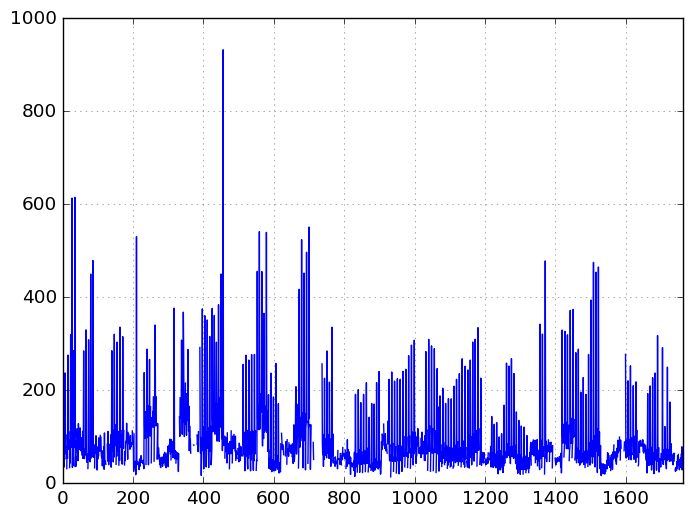

In [9]:
ED_visits_df['Rate (per 10k)'].plot()

Some NaN values to take into account

In [8]:
indsNaN= ED_visits_df.isnull().any(1)
df_NaN= ED_visits_df[indsNaN]
df_NaN

,County,Year,Age Group,Ethnicity,Gender,Number,Rate (per 10k)
11,Alameda,2012,all,american indian/alaskan native,all,5.0,NaN
19,Alameda,2013,all,american indian/alaskan native,all,7.0,NaN
64,Butte,2011,all,american indian/alaskan native,all,6.0,NaN
71,Butte,2012,all,asian/pacific islander,all,7.0,NaN
90,Butte,2015,all,asian/pacific islander,all,7.0,NaN
108,Calaveras,2014,all,hispanic,all,7.0,NaN
116,Colusa,2011,all,all,female,5.0,NaN
124,Colusa,2012,all,white,all,6.0,NaN
126,Colusa,2013,all,all,female,11.0,NaN
134,Colusa,2014,all,white,all,11.0,NaN


Get all visits without stratifying by ethnicity and gender

In [11]:
ED_visits_df= ED_visits_df[np.logical_and(ED_visits_df['Gender']=='all', ED_visits_df['Ethnicity']=='all')]

In [13]:
indsNaN= ED_visits_df.isnull().any(1)
df_NaN= ED_visits_df[indsNaN]
df_NaN

,County,Year,Age Group,Ethnicity,Gender,Number,Rate (per 10k)
632,Mariposa,2014,all,all,all,9.0,NaN
636,Mariposa,2015,all,all,all,10.0,NaN
707,Modoc,2011,all,all,all,9.0,NaN
722,Mono,2011,all,all,all,6.0,NaN
724,Mono,2012,all,all,all,8.0,NaN
729,Mono,2014,all,all,all,11.0,NaN
1393,Sierra,2011,all,all,all,5.0,NaN
1590,Trinity,2012,all,all,all,8.0,NaN
1593,Trinity,2013,all,all,all,5.0,NaN
1597,Trinity,2015,all,all,all,7.0,NaN


Complete these numbers base on current population

In [16]:
df_NaN.loc[:,'Population']= np.array([0.] * len(df_NaN))
df_NaN.loc[:,'Persons under 18 years percent']= np.array([0.] * len(df_NaN))

In [22]:
census_df= pd.read_csv('Census_byCounty.csv')

In [23]:
for i in xrange(len(df_NaN)):
    inds_tmp= census_df['County']==df_NaN.iloc[i,0]
    df_NaN.iat[i,7]= census_df.loc[inds_tmp,'Population']
    df_NaN.iat[i,8]= census_df.loc[inds_tmp,'Persons under 18 years percent']

In [24]:
df_NaN.loc[:,'Rate (per 10k)']= np.around(10000.*df_NaN['Number']/(df_NaN['Persons under 18 years percent']*df_NaN['Population']*0.01),decimals=1)

In [25]:
ED_visits_df.loc[indsNaN,'Rate (per 10k)']= df_NaN.loc[:,'Rate (per 10k)']

In [33]:
ED_visits_df.isnull().any(0)

County            False
Year              False
Age Group         False
Ethnicity         False
Gender            False
Number            False
Rate (per 10k)    False
dtype: bool

### Check variation per county

In [34]:
inds2015= (ED_visits_df['Year']==2015)
inds2014= (ED_visits_df['Year']==2014)

In [38]:
counties= np.array(ED_visits_df.loc[inds2015,'County'])
N_counties= len(counties)
print 'Number of counties %d' % N_counties

Number of counties 56


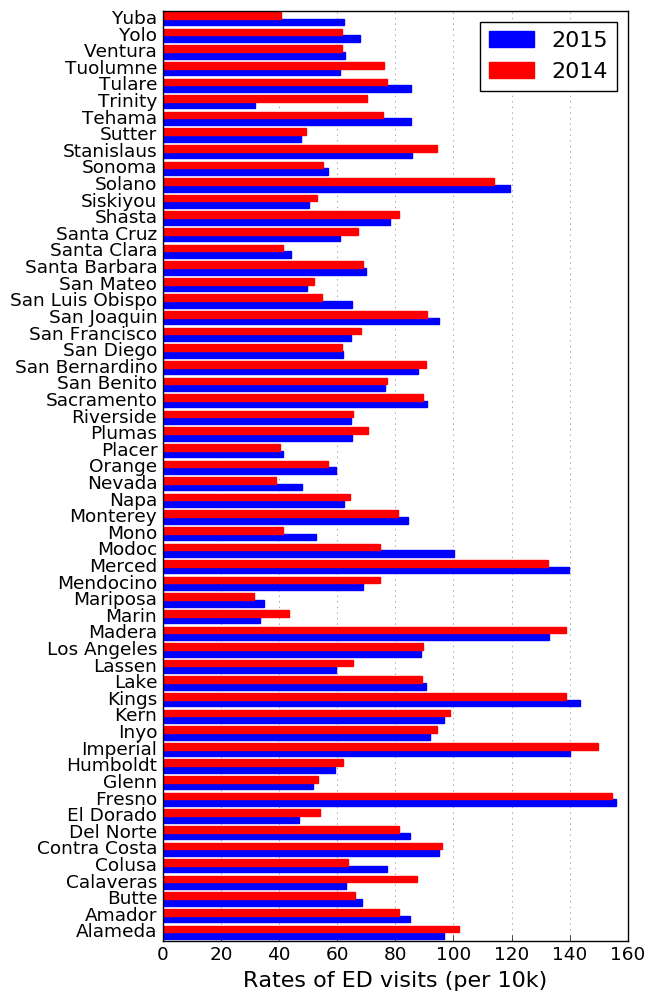

In [41]:
plt.figure(figsize=(6,12))
ax= plt.subplot(111)

indsPLT= np.arange(N_counties)
width= 0.4

plt.barh(indsPLT+0.1, ED_visits_df.loc[inds2015,'Rate (per 10k)'], height=width, color='b',ec='b', label='2015')
plt.barh(indsPLT+0.5, ED_visits_df.loc[inds2014,'Rate (per 10k)'], height=width, color='r',ec='r', label='2014')

plt.legend(loc='best')
plt.ylim(0,N_counties)
plt.grid(axis='y')
plt.yticks(indsPLT+0.5,counties)
plt.xlabel('Rates of ED visits (per 10k)')

ax.yaxis.set_ticks_position('none')
# ax.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('none')

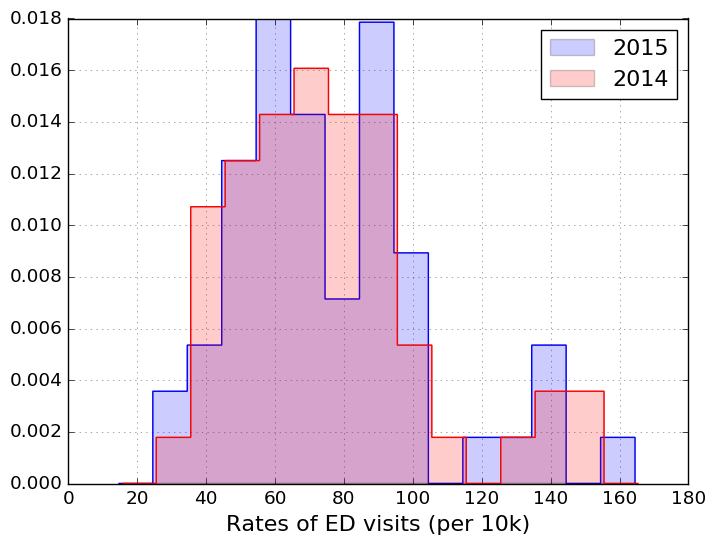

In [91]:
bins=np.arange(15,175,10)
phase= 0.5
# bins=np.arange(20,180,10)
plt.hist(ED_visits_df.loc[inds2015,'Rate (per 10k)'],bins=bins-phase,normed=True, histtype='stepfilled', color='b',alpha=0.2,label='2015')
plt.hist(ED_visits_df.loc[inds2015,'Rate (per 10k)'],bins=bins-phase,normed=True, histtype='step', color='b')

plt.hist(ED_visits_df.loc[inds2014,'Rate (per 10k)'],bins=bins+phase,normed=True, histtype='stepfilled', color='r',alpha=0.2,label='2014')
plt.hist(ED_visits_df.loc[inds2014,'Rate (per 10k)'],bins=bins+phase,normed=True, histtype='step', color='r')

plt.legend(loc='best')
plt.xlabel('Rates of ED visits (per 10k)')

### Check variation with time

In [97]:
inds1= ED_visits_df['County']=='Los Angeles'
inds2= ED_visits_df['County']=='Lake'
inds3= ED_visits_df['County']=='Napa'

In [98]:
ED_visits_df_1= ED_visits_df.loc[inds1]
ED_visits_df_2= ED_visits_df.loc[inds2]
ED_visits_df_3= ED_visits_df.loc[inds3]

In [105]:
ED_visits_df_1['Year']

514    2011
522    2012
530    2013
538    2014
546    2015
Name: Year, dtype: int64

([<matplotlib.axis.XTick at 0x7f4066fe0890>,
 <a list of 5 Text xticklabel objects>)

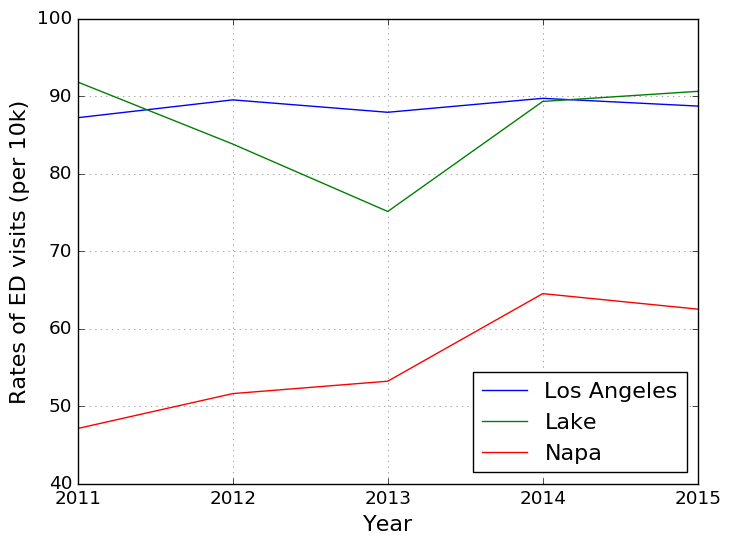

In [106]:
plt.plot(ED_visits_df_1['Year'],ED_visits_df_1['Rate (per 10k)'],label=ED_visits_df_1.iat[0,0])
plt.plot(ED_visits_df_2['Year'],ED_visits_df_2['Rate (per 10k)'],label=ED_visits_df_2.iat[0,0])
plt.plot(ED_visits_df_3['Year'],ED_visits_df_3['Rate (per 10k)'],label=ED_visits_df_3.iat[0,0])

plt.legend(loc='best')
plt.ylabel('Rates of ED visits (per 10k)')
plt.xlabel('Year')
plt.xticks(ED_visits_df_1['Year'])

# ax= plt.gca()
# ax.get_xaxis().get_major_formatter().set_useOffset(False)